Authors: A.Radhakrishnan, GFDL
Ack: Anderson Banihirwe for intake-esm updates, GFDL colleagues for data

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import xarray as xr
import intake,yaml
import intake_esm
import numpy as np
%matplotlib inline

esgf-world.json is the ESM collections spec file for the netCDF data in the S3 bucket esgf-world. 
The catalog is updated on an on-demand basis for now. 
You can refer to https://github.com/aradhakrishnanGFDL/gfdl-aws-analysis/tree/community/esm-collection-spec-examples for the most recent catalogs
More examples can be found in https://github.com/aradhakrishnanGFDL/gfdl-aws-analysis/tree/community/examples 


In [2]:
col_url = "https://cmip6-nc.s3.us-east-2.amazonaws.com/esgf-world.json" 
#col_url = "https://raw.githubusercontent.com/aradhakrishnanGFDL/gfdl-aws-analysis/community/esm-collection-spec-examples/esgf-world.json"

In [3]:
col = intake.open_esm_datastore(col_url)

In [4]:
col.df

,project,institution_id,source_id,experiment_id,frequency,modeling_realm,table_id,member_id,grid_label,variable_id,temporal_subset,version,path
0,CMIP6,AS-RCEC,TaiESM1,histSST-piNTCF,NaN,NaN,AERmon,r1i1p1f1,gn,ps,185001-201412,v20200318,s3://esgf-world/CMIP6/AerChemMIP/AS-RCEC/TaiES...
1,CMIP6,AS-RCEC,TaiESM1,histSST-piNTCF,NaN,NaN,CFmon,r1i1p1f1,gn,ta,185001-201412,v20200318,s3://esgf-world/CMIP6/AerChemMIP/AS-RCEC/TaiES...
2,CMIP6,AS-RCEC,TaiESM1,histSST-piNTCF,NaN,NaN,LImon,r1i1p1f1,gn,snc,185002-201412,v20200318,s3://esgf-world/CMIP6/AerChemMIP/AS-RCEC/TaiES...
3,CMIP6,AS-RCEC,TaiESM1,histSST-piNTCF,NaN,NaN,LImon,r1i1p1f1,gn,snd,185002-201412,v20200318,s3://esgf-world/CMIP6/AerChemMIP/AS-RCEC/TaiES...
4,CMIP6,AS-RCEC,TaiESM1,histSST-piNTCF,NaN,NaN,LImon,r1i1p1f1,gn,snw,185002-201412,v20200318,s3://esgf-world/CMIP6/AerChemMIP/AS-RCEC/TaiES...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056261,CMIP6,UA,MCM-UA-1-0,ssp585,mon,atmos,Amon,r1i1p1f2,gn,rlut,201501-210012,v20190731,s3://esgf-world/CMIP6/ScenarioMIP/UA/MCM-UA-1-...
1056262,CMIP6,UA,MCM-UA-1-0,ssp585,mon,atmos,Amon,r1i1p1f2,gn,rtmt,201501-210012,v20190731,s3://esgf-world/CMIP6/ScenarioMIP/UA/MCM-UA-1-...
1056263,CMIP6,UA,MCM-UA-1-0,ssp585,mon,ocean,Omon,r1i1p1f2,gn,sos,201501-210012,v20190731,s3://esgf-world/CMIP6/ScenarioMIP/UA/MCM-UA-1-...
1056264,CMIP6,UA,MCM-UA-1-0,ssp585,mon,ocean,Omon,r1i1p1f2,gn,tos,201501-210012,v20190731,s3://esgf-world/CMIP6/ScenarioMIP/UA/MCM-UA-1-...


In [5]:
#Examples to just search for what we want from the catalog
expname_filter = ['historical']
table_id_filter = 'Amon'
model_filter = 'GFDL-ESM4'
variable_id_filter = "tas"
ens_filter = "r1i1p1f1"
version_filter = "v20190726"
cat = col.search(experiment_id=expname_filter, table_id=table_id_filter,source_id=model_filter,variable_id=variable_id_filter,version="v20190726")

In [6]:
cat

,unique
project,1
institution_id,1
source_id,1
experiment_id,1
frequency,1
modeling_realm,1
table_id,1
member_id,1
grid_label,1
variable_id,1


In [7]:
dset_dict = cat.to_dataset_dict(cdf_kwargs={'chunks': {'time': 1}},storage_options={'anon':True})




--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institution_id.source_id.experiment_id.table_id'


In [8]:
dset_dict

{'CMIP6.NOAA-GFDL.GFDL-ESM4.historical.Amon': <xarray.Dataset>
 Dimensions:    (bnds: 2, lat: 180, lon: 288, member_id: 1, time: 1980)
 Coordinates:
   * bnds       (bnds) float64 1.0 2.0
     height     float64 ...
   * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
   * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
   * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
   * member_id  (member_id) <U8 'r1i1p1f1'
 Data variables:
     lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
     lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
     tas        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 1, 180, 288), meta=np.ndarray>
     time_bnds  (time, bnds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
 Attributes: (12/47)
     tracking_id:             hdl:21.14100/75e5c5a7-d7c4-4860-beb1-db454f25f13...
     contact:                

In [9]:
hxr_gfdl_esm4 = dset_dict["CMIP6.NOAA-GFDL.GFDL-ESM4.historical.Amon"]

In [10]:
hxr_gfdl_esm4.tas

,Array,Chunk
Bytes,391.55 MiB,202.50 kiB
Shape,"(1, 1980, 180, 288)","(1, 1, 180, 288)"
Count,6 Graph Layers,1980 Chunks
Type,float32,numpy.ndarray


! GLOBAL MEAN 
let hgtas = tas[x=@ave,y=@ave,d=1,l=529:780@ave]


In [11]:
lat1 = 60
lat2 = 90

In [12]:
tas = hxr_gfdl_esm4.tas
weights = np.cos(np.deg2rad(tas.lat))
weights.name = "weights"

!!!!!!!!!!!!!!!! COMPUTE BASELINE (1994-2014) TAS !!!!!!!!!!!!!!!!!!!!!!!!

In [13]:
hgtas = hxr_gfdl_esm4.tas.sel(time=slice("1994", "2014"))
hgtas = hgtas.weighted(weights)
hgtas = hgtas.mean(dim=['lon','lat','time'])
hgtas = hgtas.values
print(hgtas) 

[287.16173045]


In [14]:
hatas = hxr_gfdl_esm4.tas.sel(time=slice("1994", "2014"),lat=slice(lat1, lat2))
hatas = hatas.weighted(weights)
hatas = hatas.mean(dim=['lon','lat','time'])
hatas = hatas.values 
print(hatas)

[264.3833672]


(array([  54238.,  294657.,  313952.,  822221.,  868236., 1102418.,
        2664606., 2776262., 4056464.,  110626.]),
 array([199.64807, 211.30887, 222.96968, 234.63048, 246.29129, 257.9521 ,
        269.61288, 281.27368, 292.9345 , 304.5953 , 316.2561 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

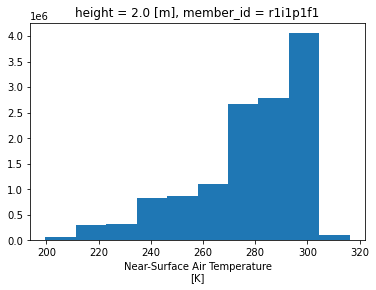

In [15]:
hgtas_hist = tas.sel(time=slice("1994", "2014"))
hgtas_hist.plot()

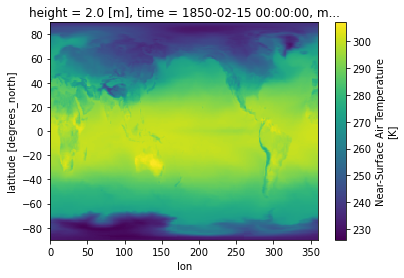

In [16]:
hgtas2d = tas.isel(time=1).plot()
